In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, boxcox
sns.set()
warnings.filterwarnings('ignore')

In [2]:
copper_data= pd.read_csv(r'Copper_Set.csv')
copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


# **Preprocessing**

In [3]:
copper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
copper_data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
# Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value
print(copper_data['material_ref'].isna().sum())
copper_data[(copper_data['material_ref'].isna()==False) &(copper_data['material_ref'].str.startswith('00000'))]

77919


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.0
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.0
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.0
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0


In [6]:
# Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value which should be converted into null.
print(copper_data['material_ref'].isna().sum())
copper_data['material_ref'] =np.where((copper_data['material_ref'].isna()==False) &(copper_data['material_ref'].str.startswith('00000')), 
                                    np.nan, 
                                    copper_data['material_ref'])
print(copper_data['material_ref'].isna().sum())

77919
100645


In [7]:
copper_data.isna().sum()

id                    2
item_date             1
quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         1
dtype: int64

In [8]:
copper_data.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:
# The 'id' column have 181671 unique values. This column not affect model building and prediction. we have to drop the 'id' column
copper_data.drop('id', axis = 1, inplace = True)
copper_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [10]:
print('Number of empty cells in material_ref column :',copper_data.material_ref.isna().sum())
print('Percentage of empty cells in material_ref column :',(copper_data.material_ref.isna().sum()/copper_data.shape[0])*100)

Number of empty cells in material_ref column : 100645
Percentage of empty cells in material_ref column : 55.39898609039318


In [11]:
# Percentage of empty cells in "material_ref" column is 55.40% .
# while train model "material_ref" column leads to decrease the accuracy. we can remove the column
copper_data.drop('material_ref', axis = 1, inplace = True)
copper_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [12]:
copper_data.isna().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [13]:
# TYPE COSTING

copper_data['quantity tons'] = copper_data['quantity tons'].astype(float, errors='ignore')
copper_data['customer'] = copper_data['customer'].astype(int,errors='ignore')
copper_data['country'] = copper_data['country'].astype(int, errors='ignore')
copper_data['application'] = copper_data['application'].astype(int, errors='ignore')
copper_data['thickness'] = copper_data['thickness'].astype(float, errors='ignore')
copper_data['width'] = copper_data['width'].astype(float, errors='ignore')
copper_data['selling_price'] = copper_data['selling_price'].astype(float, errors='ignore')


# Converting object type data into date format
copper_data['item_date'] = copper_data['item_date'].astype(str)
copper_data['delivery date'] = copper_data['delivery date'].astype(str)
copper_data['delivery date'] = pd.to_datetime(copper_data['delivery date'],format = '%Y%m%d.0', errors='coerce').dt.strftime('%Y/%m/%d')
copper_data['item_date'] = pd.to_datetime(copper_data['item_date'],format = '%Y%m%d.0', errors='coerce').dt.strftime('%Y/%m/%d')

copper_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021/04/01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021/07/01,854.00
1,2021/04/01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021/04/01,1047.00
2,2021/04/01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021/01/01,644.33
3,2021/04/01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021/01/01,768.00
4,2021/04/01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021/03/01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020/07/02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020/07/01,591.00
181669,2020/07/02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020/07/01,589.00
181670,2020/07/02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020/07/01,619.00
181671,2020/07/02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020/07/01,601.00


In [14]:
# To coverting inappropriate values data into null values in quatity tons column

copper_data['quantity tons'] = np.where(copper_data['quantity tons']=='e', np.nan, copper_data['quantity tons'])

# To coverting negative values data into null values in numerical column
copper_data['quantity tons'] =copper_data['quantity tons'].astype(float)
copper_data['quantity tons'] = np.where(copper_data['quantity tons'] < 0 , np.nan, copper_data['quantity tons'])

copper_data['selling_price'] =copper_data['selling_price'].astype(float)
copper_data['selling_price'] = np.where(copper_data['selling_price'] < 0 , np.nan, copper_data['selling_price'])


In [15]:
for col in copper_data.columns:

    print(col,'----------mode---------->', copper_data[col].mode()[0])

item_date ----------mode----------> 2020/12/02
quantity tons ----------mode----------> 1e-05
customer ----------mode----------> 30157111.0
country ----------mode----------> 78.0
status ----------mode----------> Won
item type ----------mode----------> W
application ----------mode----------> 10.0
thickness ----------mode----------> 2.0
width ----------mode----------> 1250.0
product_ref ----------mode----------> 611993
delivery date ----------mode----------> 2021/01/01
selling_price ----------mode----------> 832.0


In [16]:
copper_data.isna().sum()


item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     6
dtype: int64

In [17]:
for col in copper_data.columns:
    copper_data[col].fillna(copper_data[col].mode()[0], inplace = True)
copper_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
# comparing the Number of row count and Number of empty cells count,Number of empty cell count is less than Number of row count.
# Number of empty cell count is negligible. so, we have to remove the empty cells
copper_data.dropna(axis=0, inplace = True)

# To reset the index values
copper_data.reset_index(drop=True, inplace=True)

In [19]:
copper_data.shape

(181673, 12)

In [20]:
copper_data.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [21]:
copper_data.nunique()

item_date           250
quantity tons    181668
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
delivery date        26
selling_price      9790
dtype: int64

In [22]:
# identifying the categorical and numerical columns
numeric_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
category_columns =['item_date', 'delivery date', 'customer', 'country', 'status', 'item type', 'application', 'product_ref']

In [23]:
for col in ['country', 'status', 'item type','application']:
    print(col,copper_data[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [24]:
for col in ['status', 'item type']:
    print(copper_data[col].value_counts())
    print('--'*20)

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
----------------------------------------
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
----------------------------------------


# **Skewness**

In [25]:
copper_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021/04/01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021/07/01,854.00
1,2021/04/01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021/04/01,1047.00
2,2021/04/01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021/01/01,644.33
3,2021/04/01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021/01/01,768.00
4,2021/04/01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021/03/01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020/07/02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020/07/01,591.00
181669,2020/07/02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020/07/01,589.00
181670,2020/07/02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020/07/01,619.00
181671,2020/07/02,0.000010,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020/07/01,601.00


In [26]:
# identifying the categorical and numerical columns
numerical_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
categorical_columns =['item_date', 'delivery date', 'customer', 'country', 'status', 'item type', 'application', 'product_ref']
copper_data[numerical_columns].skew()

quantity tons    424.690816
width              0.374597
thickness        303.447617
selling_price    301.388088
dtype: float64

<Axes: >

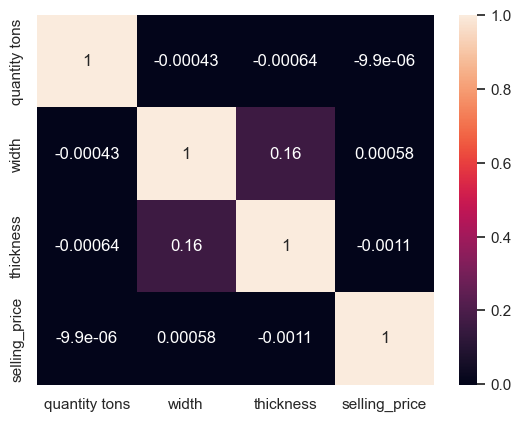

In [27]:
sns.heatmap(copper_data[numerical_columns].corr(), annot = True)

In [28]:
def skewness_plot(copper_data, *column):
    nrow = len(column)
    plot_no=0
    for col_name in column:
        if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
            title= "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 16))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=copper_data)
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(copper_data[col_name])
        plt.title(f'Distplot - Skewness: {skew(copper_data[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=copper_data)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

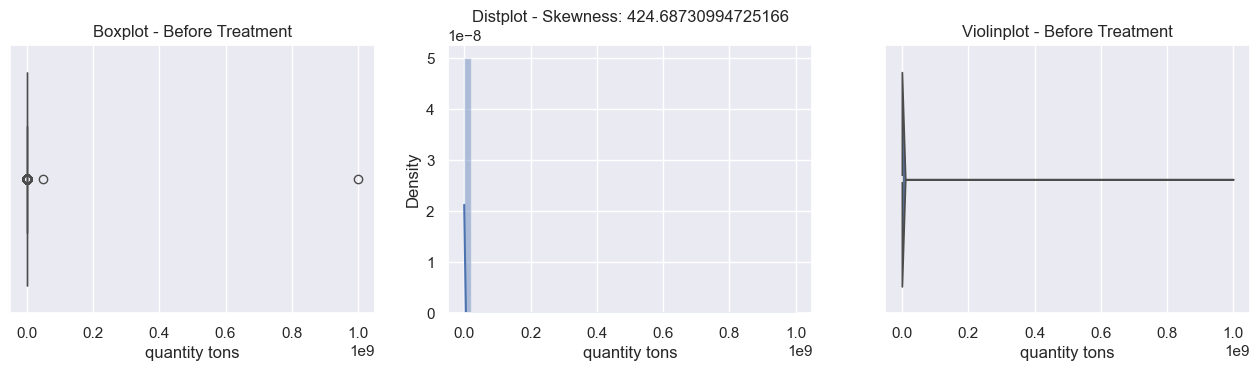

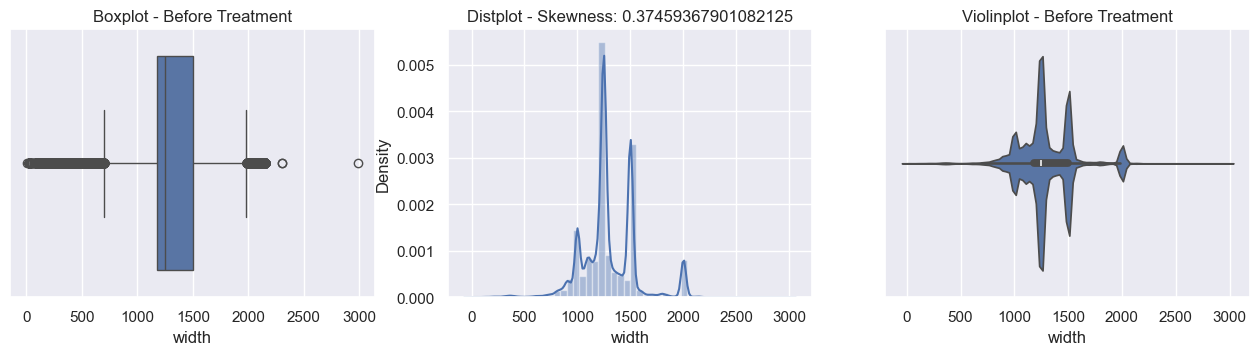

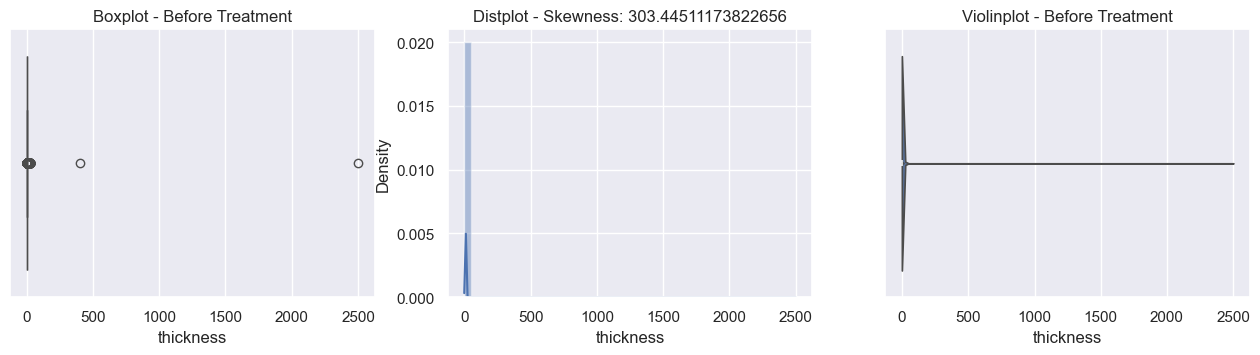

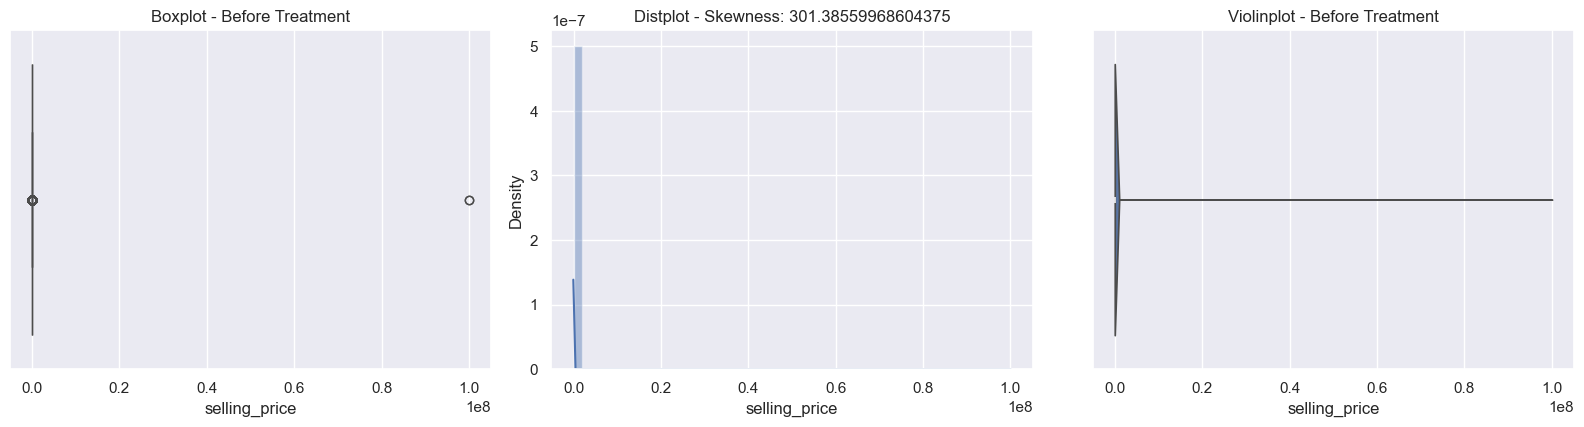

In [29]:
numerical_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
skewness_plot(copper_data, *numerical_columns)

In [30]:
def Log_Transformation(copper_data, *column):

    for col_name in column:
        # Log Tansformation
        copper_data[col_name+'_log'] = np.log1p(copper_data[col_name])

    column =[i for i in copper_data.columns if 'log' in i]

    return skewness_plot(copper_data, * column)

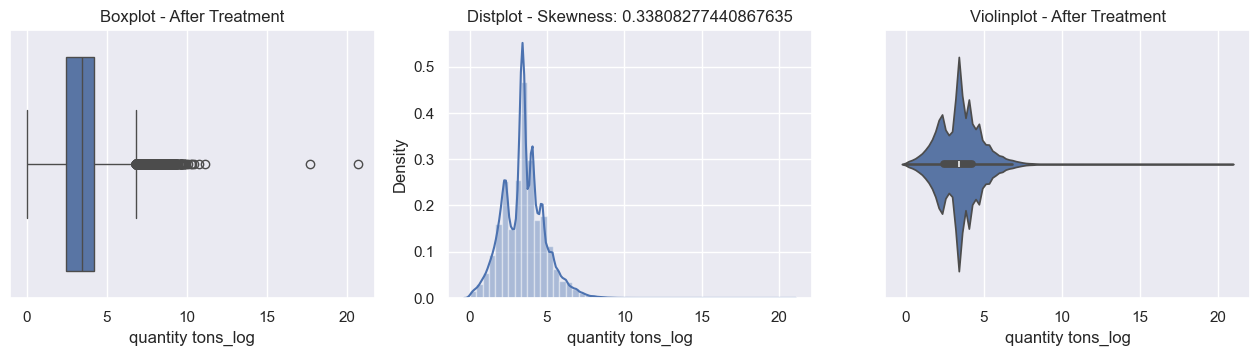

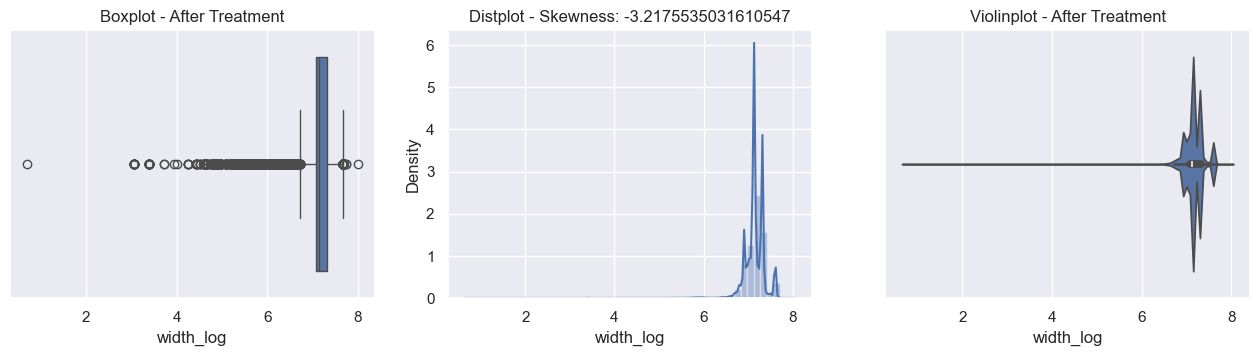

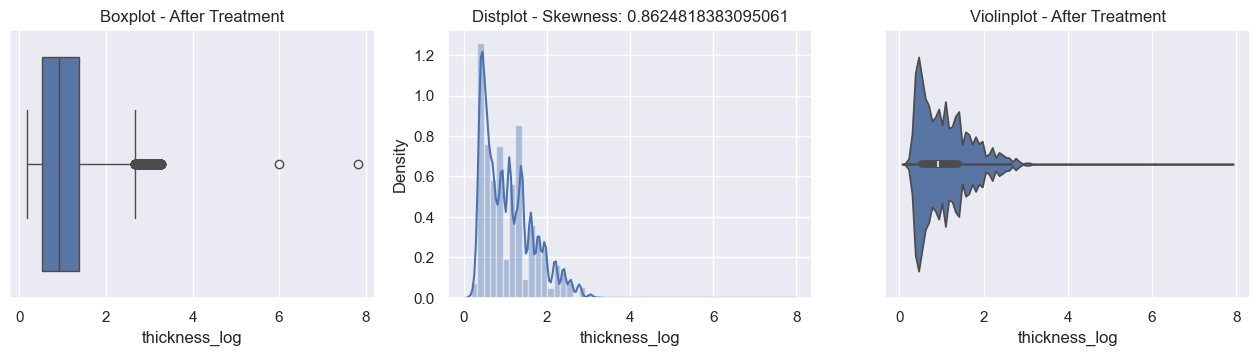

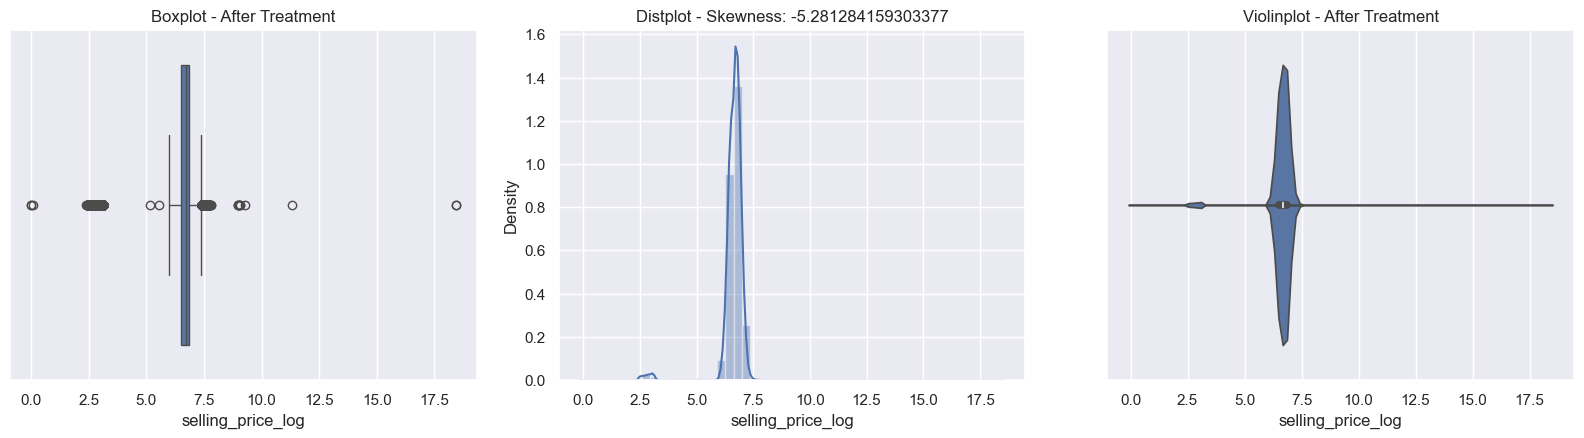

In [31]:
Log_Transformation(copper_data, *numeric_columns)

In [32]:
def Square_Root_Transformation(copper_data, *column):

    for col_name in column:
        # Square root Tansformation
        copper_data[col_name+'_sqrt'] = np.sqrt(copper_data[col_name])

    column =[i for i in copper_data.columns if 'sqrt' in i]

    return skewness_plot(copper_data, * column)

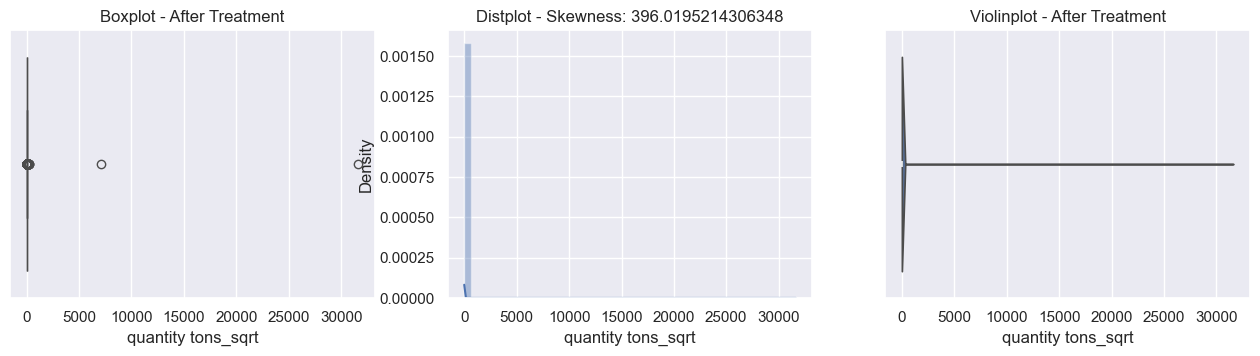

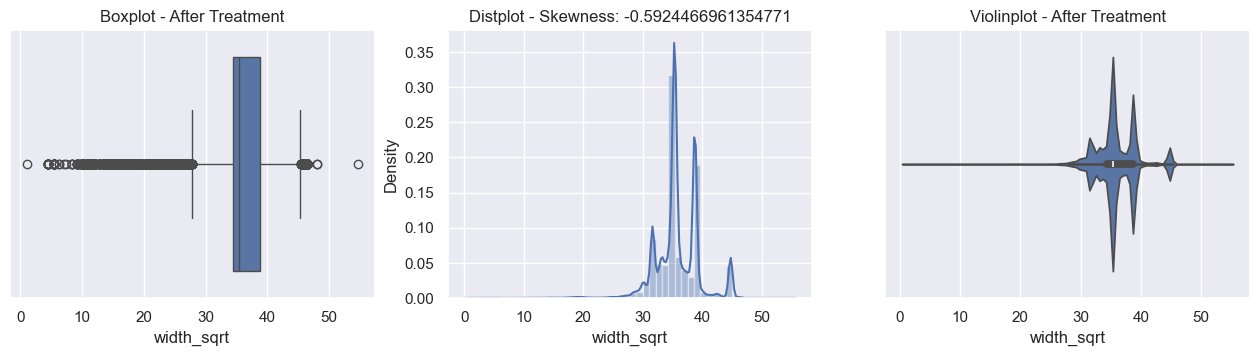

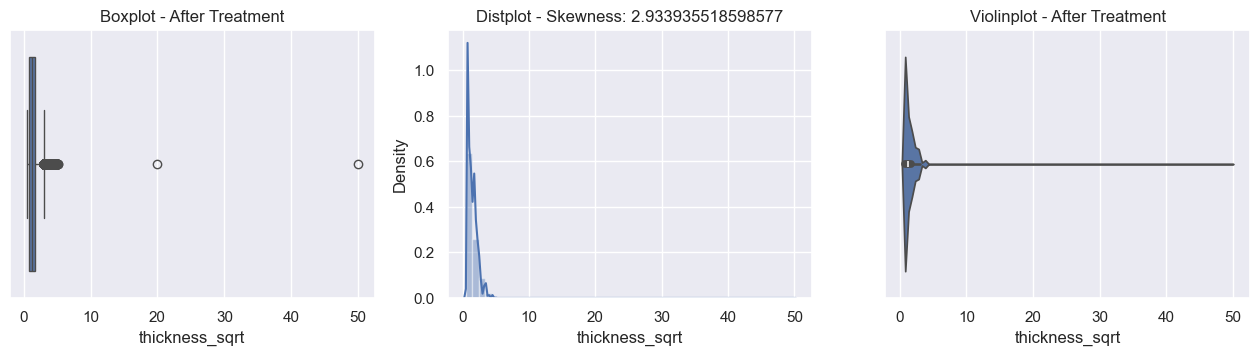

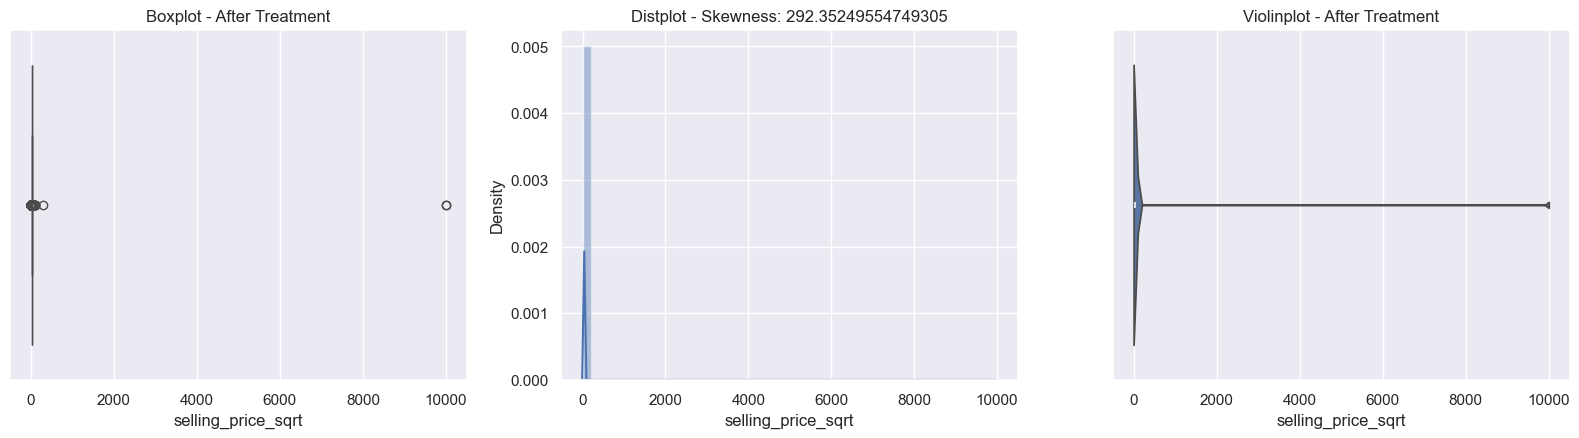

In [33]:
Square_Root_Transformation(copper_data, *numerical_columns)

In [34]:
def BoxCox_Transformation(copper_data, *column):

    for col_name in column:
        # BoxCox Transformation
        transformed_data, lambda_value = boxcox(copper_data[col_name] + 1) # Adding 1 to handle zero values
        # Update the DataFrame with the transformed data
        copper_data[col_name + '_boxcox'] = transformed_data

    column =[i for i in copper_data.columns if 'boxcox' in i]

    return skewness_plot(copper_data, * column)

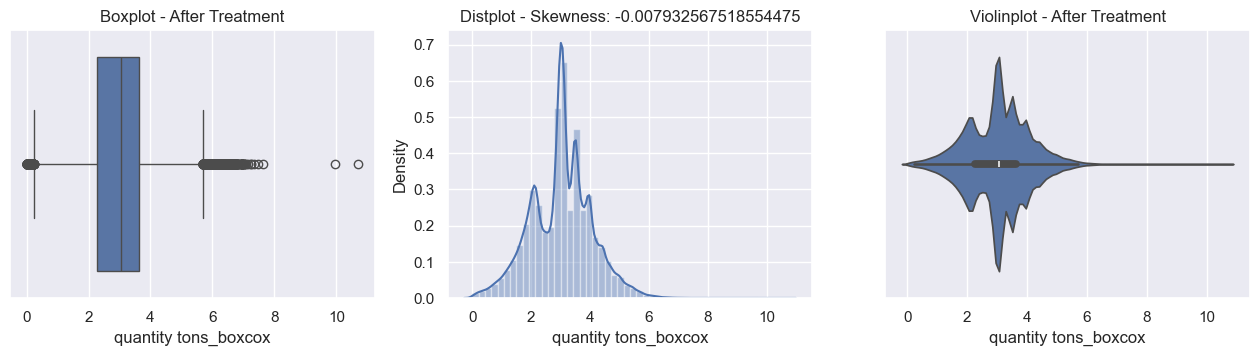

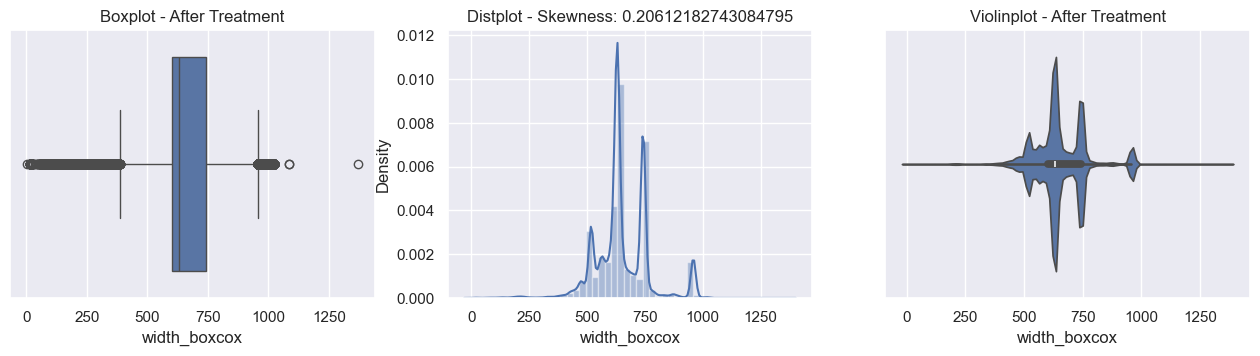

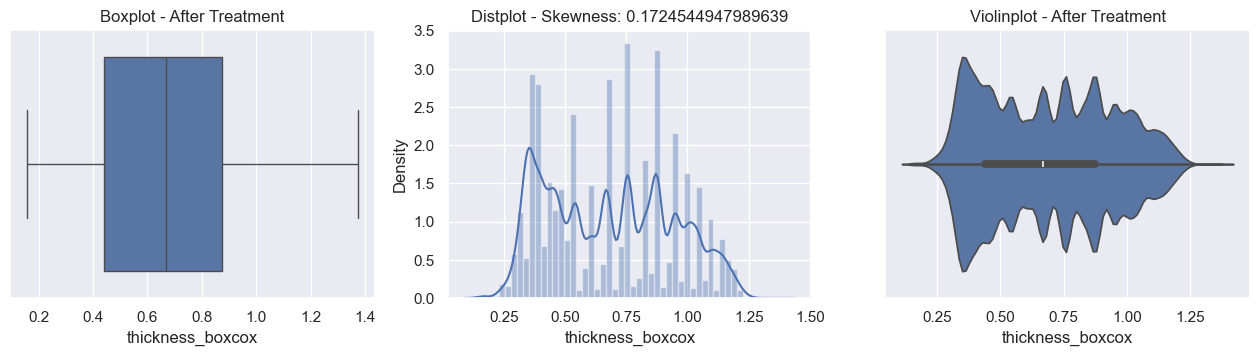

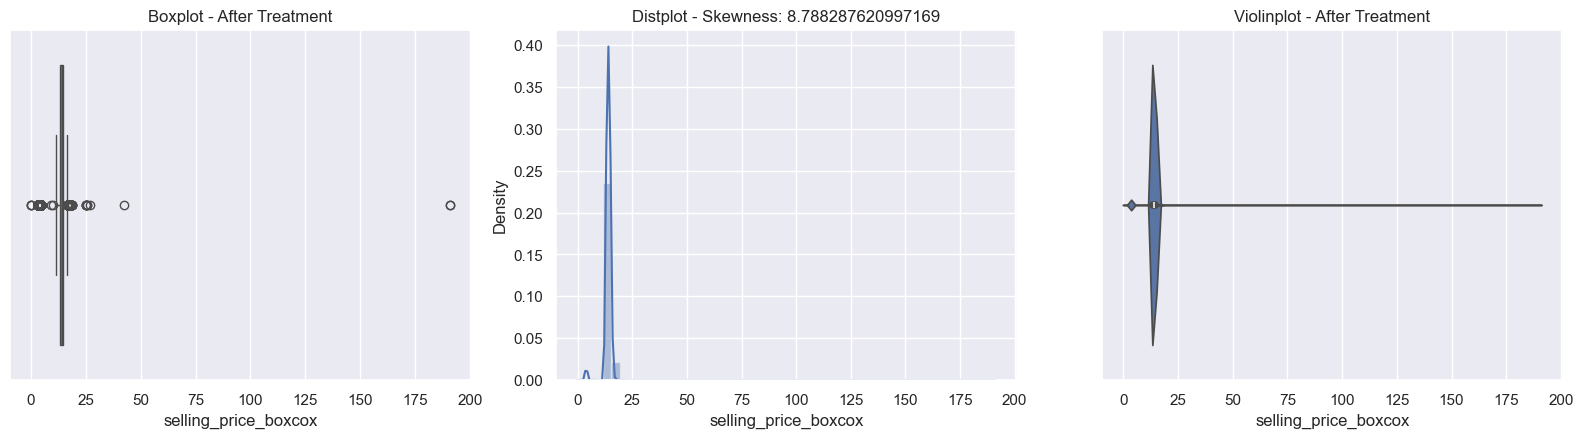

In [35]:
BoxCox_Transformation(copper_data, *numerical_columns)

In [36]:
def handling_skewness(copper_data, *column):

    for col_name in column:
        
        if col_name == 'width' or col_name =='selling_price':
            copper_data[col_name+'_sqrt'] = np.cbrt(copper_data[col_name])
        else:
            # Log Tansformation
            copper_data[col_name+'_log'] = np.log1p(copper_data[col_name])

    column =[i for i in copper_data.columns if 'log' in i or 'sqrt' in i]

    return skewness_plot(copper_data, *column)


In [37]:
copper_data[[i for i in copper_data if i not in categorical_columns]].skew()

quantity tons           424.690816
thickness               303.447617
width                     0.374597
selling_price           301.388088
quantity tons_log         0.338086
width_log                -3.217580
thickness_log             0.862489
selling_price_log        -5.281328
quantity tons_sqrt      396.022791
width_sqrt               -0.592452
thickness_sqrt            2.933960
selling_price_sqrt      292.354909
quantity tons_boxcox     -0.007933
width_boxcox              0.206124
thickness_boxcox          0.172456
selling_price_boxcox      8.788360
dtype: float64

In [38]:
for i in copper_data.columns:
    try:
        if copper_data[i].skew()<1 and copper_data[i].skew() >-1:
            print(i, copper_data[i].skew())
    except:
        pass

country 0.7530895708358325
application 0.7245546198195811
width 0.3745967719109581
quantity tons_log 0.3380855658499575
thickness_log 0.8624889595460491
width_sqrt -0.592451587778263
quantity tons_boxcox -0.007932633015226039
width_boxcox 0.20612352931281772
thickness_boxcox 0.17245591870054172


In [39]:
def handling_skewness(copper_data):
    column = []
    for col_name in copper_data.columns:
        if 'log' in col_name or 'boxcox' in col_name or 'sqrt' in col_name:
            if 'quantity tons_boxcox' in col_name or 'thickness_boxcox' in col_name or 'selling_price_log' in col_name:
                column.append(col_name)
            else:
                copper_data.drop(col_name, axis =1,  inplace = True)
        
        else:
            if 'quantity tons'== col_name or 'thickness' == col_name:
                # BoxCox Transformation
                transformed_data, lambda_value = boxcox(copper_data[col_name] + 1) # Adding 1 to handle zero values
                # Update the DataFrame with the transformed data
                copper_data[col_name + '_boxcox'] = transformed_data

                column.append(col_name)
            elif 'selling_price' == col_name:
                #Log Transformation
                copper_data[col_name + '_log'] = np.log1p(copper_data[col_name])
                column.append(col_name)
            elif 'width' == col_name:
                column.append(col_name)

            else:
                pass

    return skewness_plot(copper_data, *column)
    

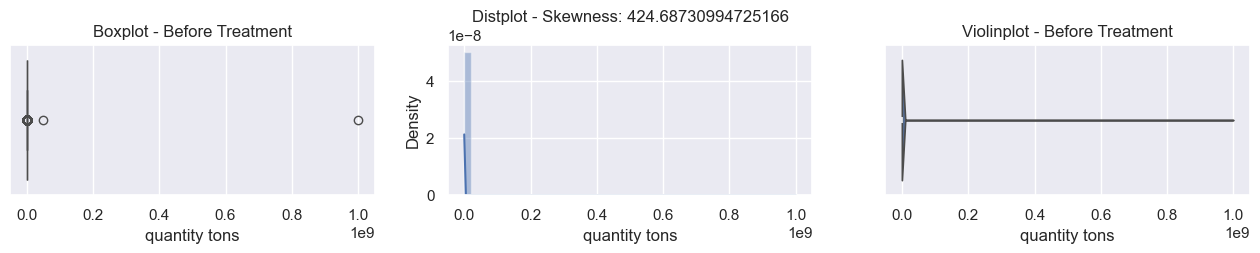

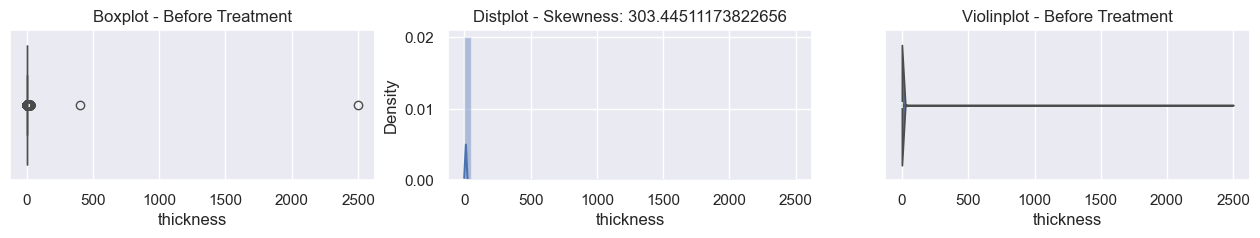

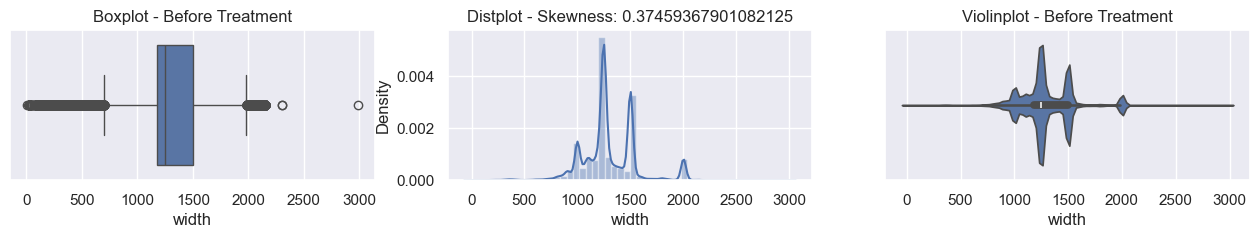

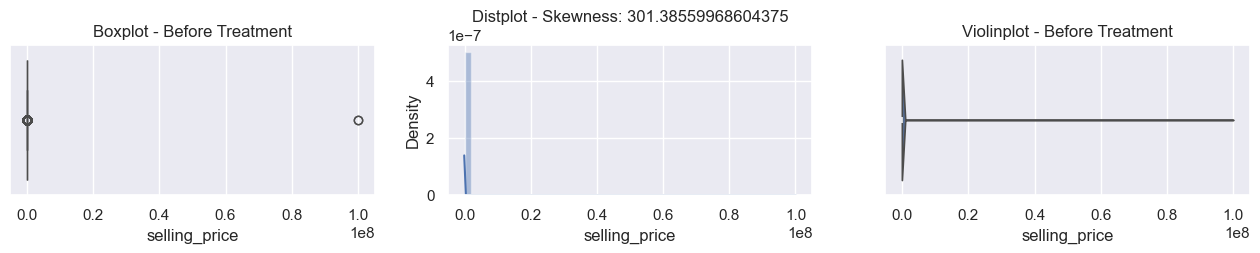

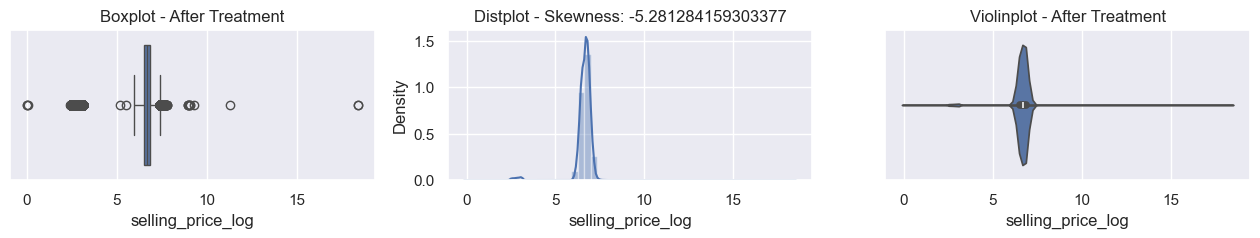

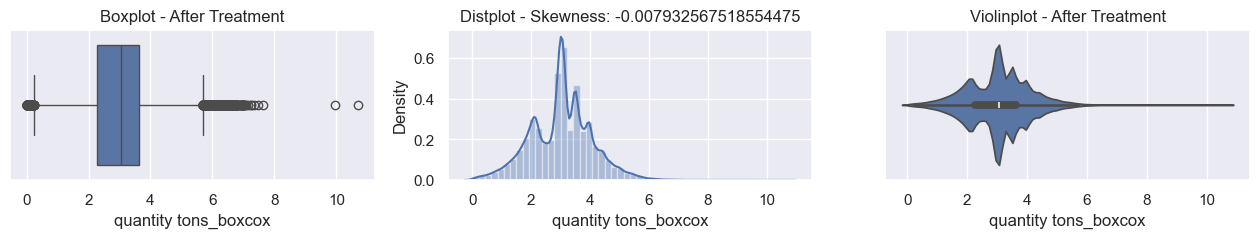

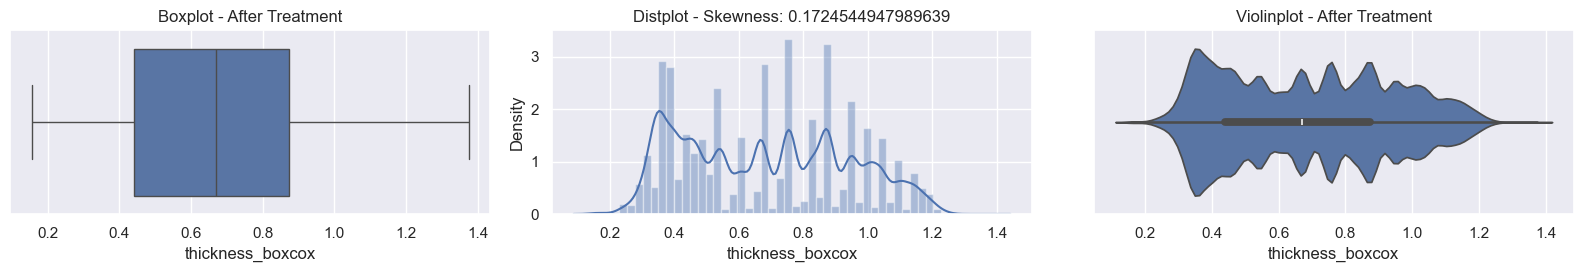

In [40]:
handling_skewness(copper_data)


<Axes: >

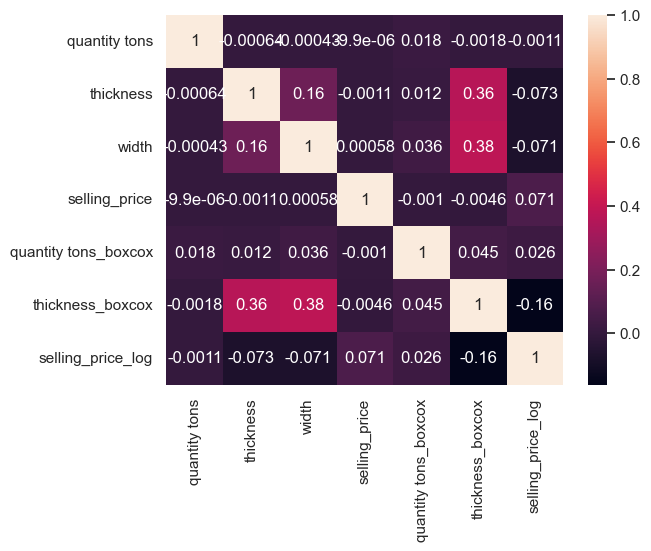

In [41]:
column_name = ['quantity tons', 'thickness', 'width', 'selling_price', 'quantity tons_boxcox', 'thickness_boxcox', 'selling_price_log']
sns.heatmap(copper_data[column_name].corr(), annot= True)

# **Handling Outliers**

In [42]:
copper_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox
0,2021/04/01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021/07/01,854.00,6.751101,3.478222,0.757342
1,2021/04/01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021/04/01,1047.00,6.954639,5.269523,0.478581
2,2021/04/01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021/01/01,644.33,6.469762,4.835471,0.287239
3,2021/04/01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021/01/01,768.00,6.645091,4.408352,0.798863
4,2021/04/01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021/03/01,577.00,6.359574,5.283390,0.949817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020/07/02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020/07/01,591.00,6.383507,3.937744,0.532507
181669,2020/07/02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020/07/01,589.00,6.380123,4.427029,0.529361
181670,2020/07/02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020/07/01,619.00,6.429719,1.559697,0.444456
181671,2020/07/02,0.000010,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020/07/01,601.00,6.400257,0.000010,0.496296


In [43]:

def outlier_plot(copper_data):

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='width', data=copper_data)
    plt.title('Boxplot - width')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='quantity tons_boxcox', data=copper_data)
    plt.title('Boxplot - quantity tons_boxcox')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='thickness_boxcox', data=copper_data)
    plt.title('Boxplot - '+ 'thickness_boxcox')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='selling_price_log', data=copper_data)
    plt.title('Boxplot - '+ 'selling_price_log')
    plt.tight_layout()
    
    return plt.show()


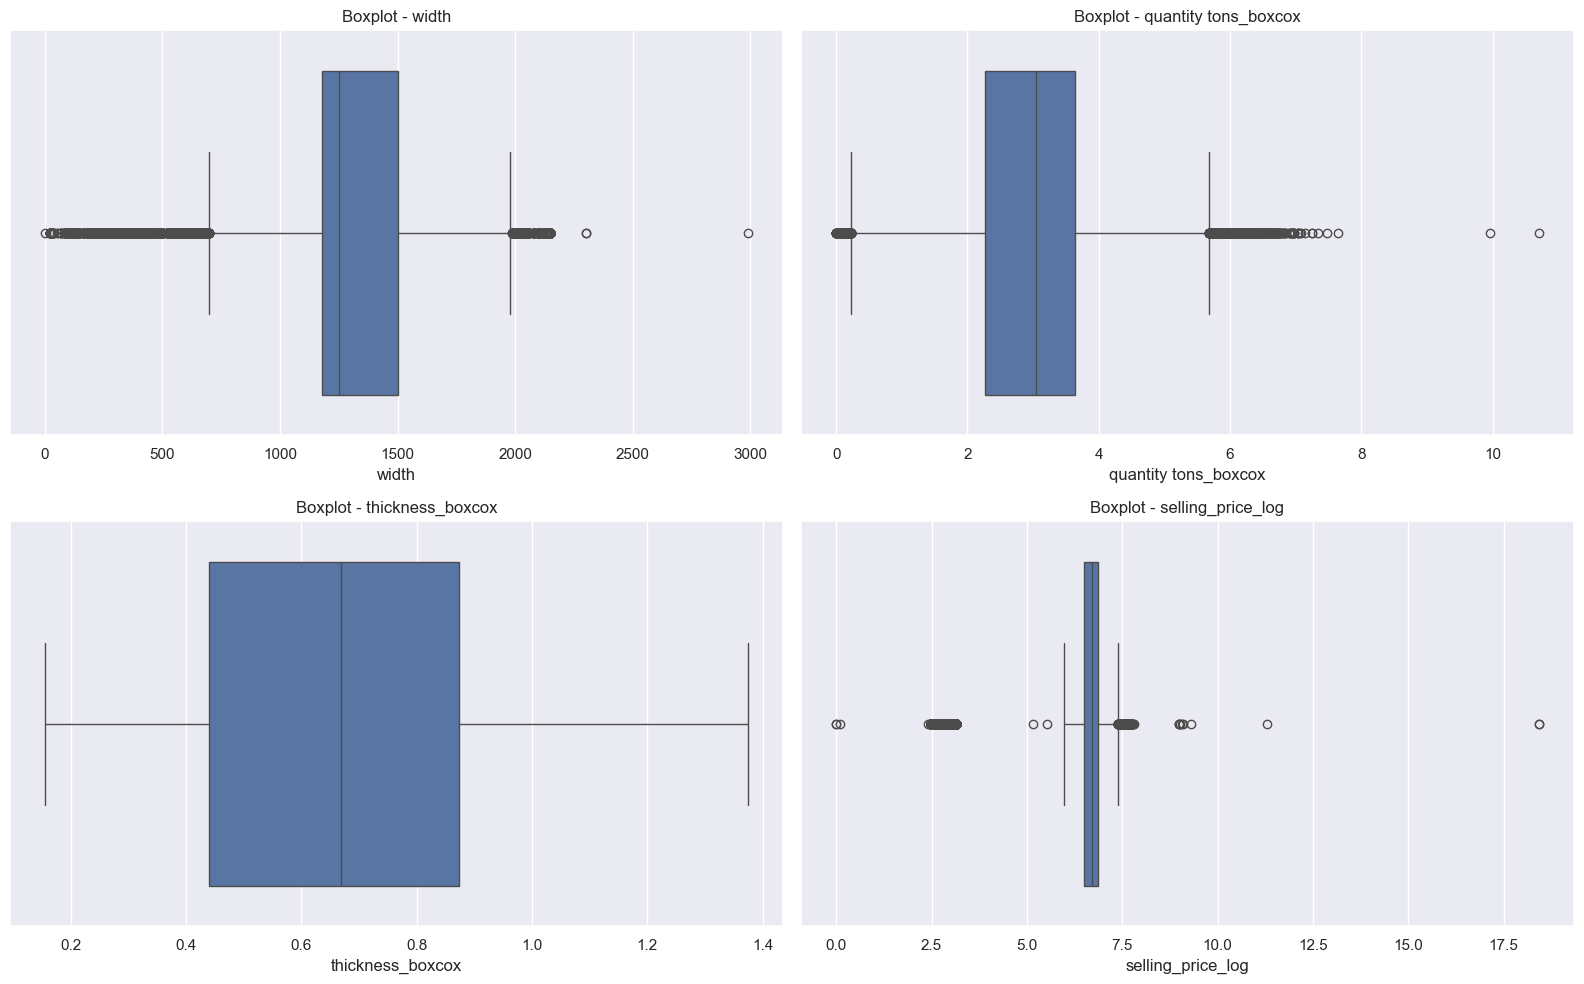

In [44]:
outlier_plot(copper_data)

In [45]:
df = copper_data.copy()

df['width'].quantile(0.25)

1180.0

In [46]:
def outlier_quantile(copper_data, *column):
    # df = copper_data.copy()
    for col_name in column:
#Finding the IQR
        percentile25 = copper_data[col_name].quantile(0.25)
        percentile75 = copper_data[col_name].quantile(0.75)
        iqr = percentile75 - percentile25

        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        copper_data[col_name] = np.where(copper_data[col_name] > upper_limit, upper_limit, copper_data[col_name])
        copper_data[col_name] = np.where(copper_data[col_name] < lower_limit, lower_limit, copper_data[col_name])

    # print(df.info())
    return outlier_plot(copper_data)


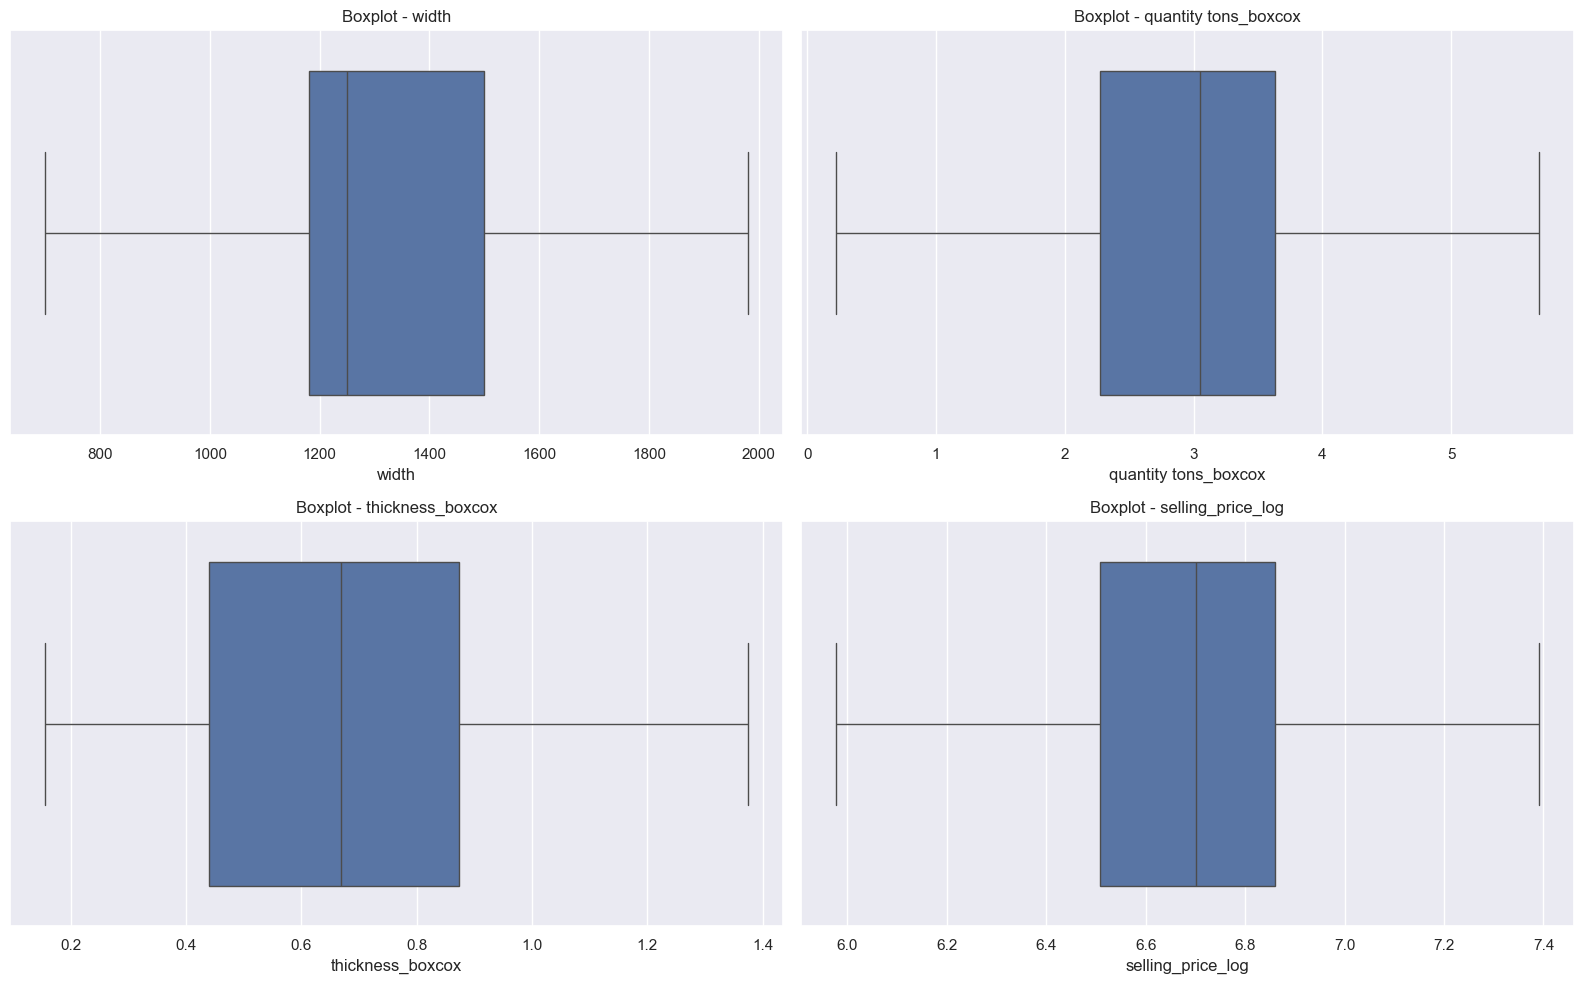

In [47]:
column_name = [ 'width', 'quantity tons_boxcox', 'thickness_boxcox', 'selling_price_log']
outlier_quantile(copper_data, *column_name)

<Axes: >

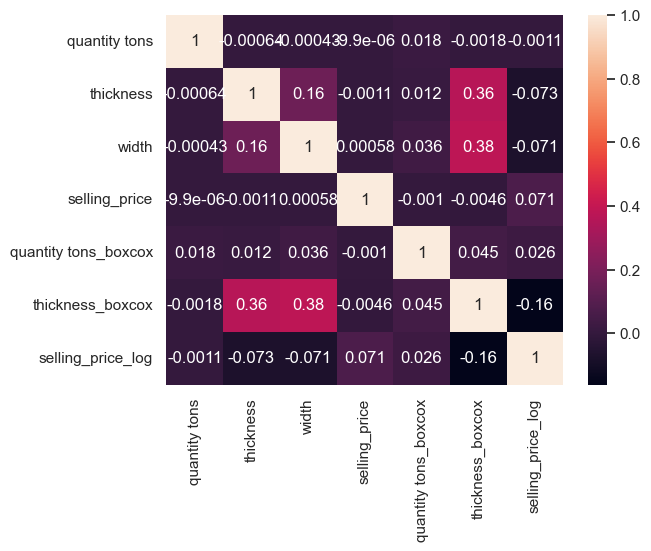

In [48]:
column_name = ['quantity tons', 'thickness', 'width', 'selling_price', 'quantity tons_boxcox', 'thickness_boxcox', 'selling_price_log']
sns.heatmap(df[column_name].corr(), annot= True)

date column

In [49]:

copper_data['day_difference'] = (pd.to_datetime(copper_data['delivery date']) - pd.to_datetime(copper_data['item_date'])).dt.days
copper_data['day_difference'].dtype
# copper_data['valid_date'] = np.where(copper_data['day_difference'] < 0, 0, 1)
# copper_data[copper_data['valid_date']==0]

dtype('int64')

In [50]:
copper_data[copper_data.day_difference >0 ]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference
0,2021/04/01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021/07/01,854.0,6.751101,3.478222,0.757342,91
6,2021/04/01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,2021/07/01,18.0,5.977199,1.429220,0.287239,91
8,2021/04/01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,2021/07/01,1363.0,7.218177,3.655543,0.398290,91
10,2021/04/01,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,2021/07/01,17.0,5.977199,2.134831,0.287239,91
12,2021/04/01,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,2021/07/01,1098.0,7.002156,2.973372,0.459997,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,2020/07/02,32.216122,30227718.0,25.0,Lost,S,15.0,6.00,1980.0,640665,2020/08/01,552.0,6.315358,3.092381,1.042765,30
181525,2020/07/02,66.431473,30161559.0,30.0,Lost,S,10.0,3.85,1525.0,640665,2020/08/01,458.0,6.129050,3.627307,0.940229,30
181527,2020/07/02,63.859521,30161559.0,30.0,Lost,S,10.0,5.85,1525.0,640665,2020/08/01,457.0,6.126869,3.598638,1.037440,30
181529,2020/07/02,56.028562,30161559.0,30.0,Lost,S,10.0,7.85,1500.0,640665,2020/08/01,458.0,6.129050,3.503198,1.095366,30


In [51]:
copper_data['item_date'] = pd.to_datetime(copper_data['item_date'], format = '%Y/%m/%d')
copper_data['delivery date'] = pd.to_datetime(copper_data['delivery date'], format = '%Y/%m/%d')

copper_data['item_date_day'] = copper_data['item_date'].dt.day
copper_data['item_date_month'] = copper_data['item_date'].dt.month
copper_data['item_date_year'] = copper_data['item_date'].dt.year
copper_data.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,6.751101,3.478222,0.757342,91,1,4,2021
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.954639,5.269523,0.478581,0,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,6.469762,4.835471,0.287239,-90,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,6.645091,4.408352,0.798863,-90,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.359574,5.283390,0.949817,-31,1,4,2021


In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [53]:
class regression:

    def __init__(self, x, y):
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor()),
                     ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)
            
            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)
            
        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [54]:
correct_delivery_date_df = copper_data[copper_data['day_difference'] > 0]
inconsitance_delivery_date_df = copper_data[copper_data['day_difference'] <= 0]
correct_delivery_date_df.shape, inconsitance_delivery_date_df.shape

((165105, 19), (16568, 19))

In [55]:
correct_delivery_date_df1= correct_delivery_date_df.copy()
inconsitance_delivery_date_df1= inconsitance_delivery_date_df.copy()

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for col_name in ['delivery date', 'item_date', 'status', 'item type']:
    correct_delivery_date_df[col_name] = enc.fit_transform(correct_delivery_date_df[[col_name]])
    inconsitance_delivery_date_df[col_name] = enc.fit_transform(inconsitance_delivery_date_df[[col_name]])

In [58]:
y = correct_delivery_date_df['day_difference']
x = correct_delivery_date_df.drop(['day_difference', 'item_date', 'delivery date'], axis =1)

In [ ]:
models = regression(x, y).all_model()
models

(132084, 16) (33021, 16) (132084,) (33021,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,1.379164e+03,1.374013e+03,31.4454,31.3073,1.020000e-01,1.019000e-01
1,RandomForestRegressor,1.219870e+01,8.856230e+01,1.3528,3.6235,9.921000e-01,9.421000e-01
2,ExtraTreesRegressor,0.000000e+00,6.866120e+01,0.0000,2.8702,1.000000e+00,9.551000e-01
3,GradientBoostingRegressor,6.829672e+02,6.939918e+02,20.4643,20.5279,5.553000e-01,5.464000e-01
4,HistGradientBoostingRegressor,4.136383e+02,4.306916e+02,15.1311,15.3704,7.307000e-01,7.185000e-01
5,DecisionTreeRegressor,0.000000e+00,1.611602e+02,0.0000,3.1987,1.000000e+00,8.947000e-01
6,XGBRegressor,2.342485e+02,2.687834e+02,10.5827,11.1960,8.475000e-01,8.243000e-01
7,LinearRegression,9.737947e+02,9.729381e+02,24.6547,24.5855,3.659000e-01,3.640000e-01
8,KNeighborsRegressor,2.554645e+02,4.016138e+02,9.3229,12.0626,8.337000e-01,7.375000e-01
9,MLPRegressor,1.697409e+11,1.471347e+11,212715.1903,211996.6658,-1.105220e+08,-9.617374e+07


In [ ]:
models['Train_Mean_Absolute_Error'] - models['Test_Mean_Absolute_Error'],

(0      0.1381
 1     -2.2707
 2     -2.8702
 3     -0.0636
 4     -0.2393
 5     -3.1987
 6     -0.6133
 7      0.0692
 8     -2.7397
 9    718.5245
 dtype: float64,)

In [59]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 12.5583, 'Test_Mean_Square_Error': 88.2171}


In [60]:
y_new = inconsitance_delivery_date_df['day_difference']
x_new = inconsitance_delivery_date_df.drop('day_difference', axis =1)

In [61]:
y_new = inconsitance_delivery_date_df['day_difference']
x_new = inconsitance_delivery_date_df.drop(['day_difference', 'item_date', 'delivery date'], axis =1)

In [62]:
day_pred = model.predict(x_new)

In [63]:
inconsitance_delivery_date_df1['day_difference'] = day_pred

In [64]:
inconsitance_delivery_date_df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.954639,5.269523,0.478581,105.27,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,6.469762,4.835471,0.287239,70.26,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,6.645091,4.408352,0.798863,59.95,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,6.359574,5.283390,0.949817,96.34,1,4,2021
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-04-01,983.00,6.891626,4.481975,0.669458,100.69,1,4,2021


In [108]:
inconsitance_delivery_date_df1['delivery_date'] = inconsitance_delivery_date_df1['item_date'] + pd.to_timedelta(inconsitance_delivery_date_df1['day_difference'], unit='D')
inconsitance_delivery_date_df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-07-15,1047.00,6.954639,5.269523,0.478581,105.27,1,4,2021,2021-07-15 06:28:48.000000000
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-06-10,644.33,6.469762,4.835471,0.287239,70.26,1,4,2021,2021-06-10 06:14:24.000000000
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-05-30,768.00,6.645091,4.408352,0.798863,59.95,1,4,2021,2021-05-30 22:48:00.000000000
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-07-06,577.00,6.359574,5.283390,0.949817,96.34,1,4,2021,2021-07-06 08:09:36.000000000
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-07-10,983.00,6.891626,4.481975,0.669458,100.69,1,4,2021,2021-07-10 16:33:35.999999999


In [67]:
from datetime import timedelta
def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date
inconsitance_delivery_date_df1['item_date'] = pd.to_datetime(inconsitance_delivery_date_df1['item_date'])
inconsitance_delivery_date_df1['delivery date'] = inconsitance_delivery_date_df1.apply(lambda x: find_delivery_date(x['item_date'], x['day_difference']), axis=1)
inconsitance_delivery_date_df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-07-15,1047.00,6.954639,5.269523,0.478581,105.27,1,4,2021
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-06-10,644.33,6.469762,4.835471,0.287239,70.26,1,4,2021
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-05-30,768.00,6.645091,4.408352,0.798863,59.95,1,4,2021
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,2021-07-06,577.00,6.359574,5.283390,0.949817,96.34,1,4,2021
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-07-10,983.00,6.891626,4.481975,0.669458,100.69,1,4,2021


In [68]:
copper_data_final = pd.concat([correct_delivery_date_df1, inconsitance_delivery_date_df1],  axis=0, ignore_index=True)

copper_data_final['delivery date'] = pd.to_datetime(copper_data_final['delivery date'])
copper_data_final['delivery_date_day'] = copper_data_final['delivery date'].dt.day
copper_data_final['delivery_date_month'] = copper_data_final['delivery date'].dt.month
copper_data_final['delivery_date_year'] = copper_data_final['delivery date'].dt.year

copper_data_final.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,...,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,...,6.751101,3.478222,0.757342,91.0,1,4,2021,1,7,2021
1,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,...,5.977199,1.429220,0.287239,91.0,1,4,2021,1,7,2021
2,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,...,7.218177,3.655543,0.398290,91.0,1,4,2021,1,7,2021
3,2021-04-01,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,...,5.977199,2.134831,0.287239,91.0,1,4,2021,1,7,2021
4,2021-04-01,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,...,7.002156,2.973372,0.459997,91.0,1,4,2021,1,7,2021


In [69]:
copper_data_final.drop(['item_date', 'delivery date'], axis =1, inplace = True )
copper_data_final

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,6.751101,3.478222,0.757342,91.00,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.0,5.977199,1.429220,0.287239,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,7.218177,3.655543,0.398290,91.00,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,17.0,5.977199,2.134831,0.287239,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.0,7.002156,2.973372,0.459997,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.0,6.383507,3.937744,0.532507,43.24,2,7,2020,14,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.0,6.380123,4.427029,0.529361,41.21,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.0,6.429719,1.559697,0.444456,39.70,2,7,2020,10,8,2020
181671,0.000010,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.0,6.400257,0.225192,0.496296,41.15,2,7,2020,12,8,2020


# **Classification**

In [70]:
df = copper_data_final[(copper_data_final['status'] == 'Won') | (copper_data_final['status'] == 'Lost')]
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,6.751101,3.478222,0.757342,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.00,7.218177,3.655543,0.398290,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.00,7.002156,2.973372,0.459997,91.00,1,4,2021,1,7,2021
5,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,628377,973.00,6.881411,3.092828,0.398290,91.00,1,4,2021,1,7,2021
7,20.807114,30211222.0,30.0,Won,W,10.0,0.45,900.0,611993,1315.19,7.182496,2.761183,0.325719,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,6.383507,3.937744,0.532507,43.24,2,7,2020,14,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,6.380123,4.427029,0.529361,41.21,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,6.429719,1.559697,0.444456,39.70,2,7,2020,10,8,2020
181671,0.000010,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,6.400257,0.225192,0.496296,41.15,2,7,2020,12,8,2020


In [71]:
df.status.value_counts()

status
Won     116012
Lost     34438
Name: count, dtype: int64

In [73]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

col_name = str(input())
data = df[col_name].unique()
data.sort()

df[col_name] = enc.fit_transform(df[[col_name]])

globals()[col_name] = {}
for i in df[col_name].unique():
    globals()[col_name][data[int(i)]] = i
print(globals()[col_name])

{'Won': 1.0, 'Lost': 0.0}


In [74]:
# item type = {'W': 5.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'WI': 6.0, 'IPL': 0.0, 'SLAWR': 4.0}
# status = {'Won': 1.0, 'Lost': 0.0}
status

{'Won': 1.0, 'Lost': 0.0}

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score

In [79]:
class classification:

    def __init__(self, x, y):
        self.models =[("AdaBoostClassifier", AdaBoostClassifier()),
                      ("RandomForestClassifier", RandomForestClassifier()),
                      ("ExtraTreesClassifier", ExtraTreesClassifier()),
                      ("BaggingClassifier", BaggingClassifier()),
                      ("ExtraTreeClassifier", ExtraTreeClassifier()),
                      ("DecisionTreeClassifier", DecisionTreeClassifier()),
                      ("XGBClassifier", XGBClassifier()),
                      ("KNeighborsClassifier", KNeighborsClassifier()),
                      ("LGBMClassifier", LGBMClassifier()),
                      ("RidgeClassifier", RidgeClassifier()),

                     ]
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x, y,test_size=0.2, random_state = 42)

    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)

            data ={'Model_Name': model_name,
                    'Train_Accuracy': round(accuracy_score(self.y_train, y_train_pred),6),
                    'Test_Accuracy': round(accuracy_score(self.y_test, y_test_pred),4),
                    'Train_Balance_Accuracy': round(balanced_accuracy_score(self.y_train, y_train_pred),6),
                    'Test_Balance_Accuracy': round(balanced_accuracy_score(self.y_test, y_test_pred),4),
                    'Train_F1_Score': round(f1_score(self.y_train, y_train_pred),6),
                    'Test_F1_Score': round(f1_score(self.y_test, y_test_pred),4),
                    'Train_ROC_AUC': round(roc_auc_score(self.y_train, y_train_pred),6),
                    'Test_ROC_AUC': round(roc_auc_score(self.y_test, y_test_pred),4),
                    }
            result.append(data)
            
        self.model_accuracy_df = pd.DataFrame(result)

        return self.model_accuracy_df

In [77]:
y = df['status']
x = df.drop('status', axis =1)

In [83]:
classification_models = classification(x,y)
models = classification_models.all_model()
models

In [ ]:
models['Train_Accuracy'] - models['Test_Accuracy']

0    0.002129
1    0.031800
2    0.028700
3    0.031889
4    0.064600
5    0.044900
6    0.011972
7    0.031112
8    0.005351
9    0.002077
dtype: float64

In [84]:
x_train, x_test, y_train, y_test = classification_models.x_train, classification_models.x_test, classification_models.y_train, classification_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120360, 19), (30090, 19), (120360,), (30090,))

In [85]:

model = ExtraTreesClassifier().fit(x_train, y_train)
y_pred= model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9712529079428381

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier   #73 minutes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred = best_estimator.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9712196743104021


In [118]:
clf_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,bootstrap=False)
clf_model.fit(x_train, y_train)
y_pred= clf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9717846460618146

In [120]:
y_test.value_counts()

status
1.0    23223
0.0     6867
Name: count, dtype: int64

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm_df.columns=[f'Predicted {i}' for i in [0.0, 1.1]]
cm_df=cm_df.rename(index={i:f'Actual {i}' for i in df['status'].unique()})
accuracy = 0
for i in range(cm_df.shape[0]):
  accuracy += cm_df.iloc[i,i]
accuracy = accuracy / cm_df.sum().sum()
print(accuracy)
cm_df

0.9717846460618146


,Predicted 0.0,Predicted 1.1
Actual 0.0,6417,450
Actual 1.0,399,22824


In [98]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      6867
         1.0       0.98      0.98      0.98     23223

    accuracy                           0.97     30090
   macro avg       0.96      0.96      0.96     30090
weighted avg       0.97      0.97      0.97     30090



In [121]:

# Get predicted probabilities for the positive class
y_probs = clf_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


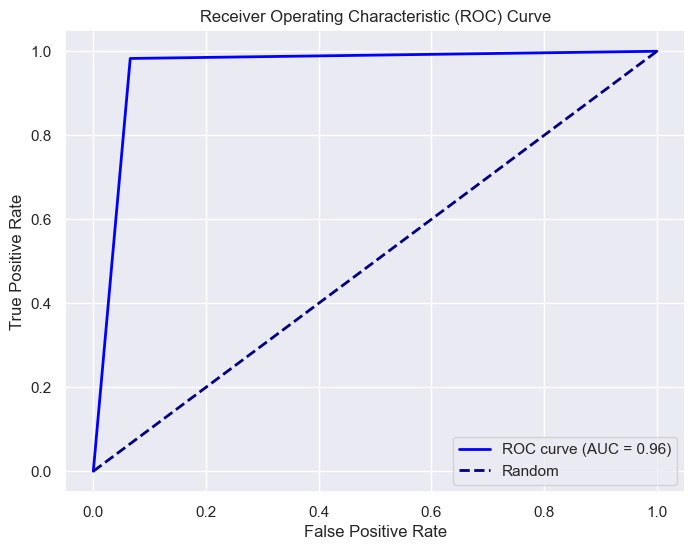

In [122]:
import matplotlib.pyplot as plt
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [106]:
import numpy as np
from scipy.stats import boxcox

# Your original data
data = [68.09, 30234134.0, 27.0, 3.0, 10, 0.85, 1432.0, 234533, 1398, np.log1p(1398), 68.09, 0.85, 30.0, 1, 4, 2022, 1, 5, 2022]

# Applying log transformation
data[9] = np.log1p(data[9])

# Checking if the data for Box-Cox is not constant
if np.unique(data[0] + 1).size > 1:
    data[10], _ = boxcox([data[10] + 1])  # Adding 1 because Box-Cox requires positive values

if np.unique(data[5] + 1).size > 1:
    data[11], _ = boxcox([data[11] + 1])  # Adding 1 because Box-Cox requires positive values

# Creating NumPy array
result_array = np.array([data])
data

[68.09,
 30234134.0,
 27.0,
 3.0,
 10,
 0.85,
 1432.0,
 234533,
 1398,
 2.109426584944646,
 68.09,
 0.85,
 30.0,
 1,
 4,
 2022,
 1,
 5,
 2022]

In [123]:
import pickle

with open('classification_model.pkl', 'wb') as file:
    pickle.dump(clf_model, file)


In [127]:
with open('classification_model.pkl', 'rb' ) as file:
    clf_model1 = pickle.load(file)

In [128]:
clf_model1.predict(result_array)

array([1.])

# **Regression**

In [129]:
df1 = copper_data_final.copy()
df1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.0,6.751101,3.478222,0.757342,91.00,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,18.0,5.977199,1.429220,0.287239,91.00,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,1363.0,7.218177,3.655543,0.398290,91.00,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,17.0,5.977199,2.134831,0.287239,91.00,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,1098.0,7.002156,2.973372,0.459997,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.0,6.383507,3.937744,0.532507,43.24,2,7,2020,14,8,2020
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.0,6.380123,4.427029,0.529361,41.21,2,7,2020,12,8,2020
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.0,6.429719,1.559697,0.444456,39.70,2,7,2020,10,8,2020
181671,0.000010,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.0,6.400257,0.225192,0.496296,41.15,2,7,2020,12,8,2020


In [137]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

col_name = str(input())
data = df1[col_name].unique()
data.sort()

df1[col_name] = enc.fit_transform(df1[[col_name]])

globals()[col_name] = {}
for i in df1[col_name].unique():
    globals()[col_name][data[int(i)]] = i
print(globals()[col_name])

{'W': 5.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'WI': 6.0, 'IPL': 0.0, 'SLAWR': 4.0}


In [138]:
# status = {'Won': 7.0, 'Draft': 0.0, 'To be approved': 6.0, 'Lost': 1.0, 'Not lost for AM': 2.0, 'Wonderful': 8.0, 'Revised': 5.0, 'Offered': 4.0, 'Offerable': 3.0}
# item_type = {'W': 5.0, 'S': 3.0, 'Others': 1.0, 'PL': 2.0, 'WI': 6.0, 'IPL': 0.0, 'SLAWR': 4.0}
status

{'Won': 7.0,
 'Draft': 0.0,
 'To be approved': 6.0,
 'Lost': 1.0,
 'Not lost for AM': 2.0,
 'Wonderful': 8.0,
 'Revised': 5.0,
 'Offered': 4.0,
 'Offerable': 3.0}

In [139]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097007e+01,3.036428e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,5.131847e+00,2.644839e+00,0.000000,2.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561375e+01,1.775391e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564824e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,700.000000,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918067e+03,3.317947e+05,0.000000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [140]:
y = df1['selling_price_log']
x = df1.drop('selling_price_log', axis =1)

In [141]:
regression_models = regression(x,y)
r_models = regression_models.all_model()
r_models

(145338, 19) (36335, 19) (145338,) (36335,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,4.000000e-04,4.000000e-04,0.0154,0.0153,9.943000e-01,9.943000e-01
1,RandomForestRegressor,0.000000e+00,0.000000e+00,0.0000,0.0000,1.000000e+00,1.000000e+00
2,ExtraTreesRegressor,0.000000e+00,0.000000e+00,0.0000,0.0003,1.000000e+00,9.999000e-01
3,GradientBoostingRegressor,0.000000e+00,0.000000e+00,0.0018,0.0018,9.999000e-01,9.999000e-01
4,HistGradientBoostingRegressor,0.000000e+00,0.000000e+00,0.0013,0.0013,9.999000e-01,9.999000e-01
5,DecisionTreeRegressor,0.000000e+00,0.000000e+00,0.0000,0.0000,1.000000e+00,1.000000e+00
6,XGBRegressor,0.000000e+00,0.000000e+00,0.0012,0.0013,9.999000e-01,9.999000e-01
7,LinearRegression,2.930000e-02,6.070000e-02,0.1160,0.1174,5.494000e-01,6.560000e-02
8,KNeighborsRegressor,1.100000e-03,1.900000e-03,0.0160,0.0214,9.836000e-01,9.710000e-01
9,MLPRegressor,3.681370e+10,6.893424e+09,50820.7351,50129.3306,-5.657007e+11,-1.060819e+11


In [142]:
r_models['Train_Mean_Absolute_Error'] - r_models['Test_Mean_Absolute_Error'],

(0      0.0001
 1      0.0000
 2     -0.0003
 3      0.0000
 4      0.0000
 5      0.0000
 6     -0.0001
 7     -0.0014
 8     -0.0054
 9    691.4045
 dtype: float64,)

In [ ]:
x_train, x_test, y_train, y_test = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [143]:

model = ExtraTreesRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 0.0, 'Test_Mean_Square_Error': 0.0203}


In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Evaluation metric (change as needed)
    verbose=2,  # Controls the verbosity: the higher, the more messages
    n_jobs=-1,  # Use all available CPUs
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 197}


In [154]:

reg_model = ExtraTreesRegressor(n_estimators = 197, max_depth = 30 , max_features = 'sqrt', min_samples_leaf = 2,
                                min_samples_split = 5, bootstrap = False)
reg_model.fit(x_train, y_train)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.8398066408268253, 'Mean Absolute Error': 0.028215353938185445, 'Mean Squared Error': 0.028215353938185445, 'Root Mean Squared Error': 0.16797426570217666}


In [157]:
data = np.array([27.46, 30341428.0,28.0, 7.0, 5.0, 41.0, 1.23,1243.0, 611993, 1.429220, 28.7239,91.0, 1,5,2021, 1,8,2021 ])
data =data.reshape(1, -1)
n =reg_model.predict(data)
n

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_boxcox,thickness_boxcox,day_difference,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,7.0,5.0,10.0,2.00,1500.0,1670798778,854.0,6.751101,3.478222,0.757342,91.0,1,4,2021,1,7,2021
1,3.522613,30209509.0,30.0,0.0,5.0,41.0,0.38,1125.0,611993,18.0,5.977199,1.429220,0.287239,91.0,1,4,2021,1,7,2021
2,69.071853,30341428.0,38.0,7.0,3.0,10.0,0.60,1275.0,1668701376,1363.0,7.218177,3.655543,0.398290,91.0,1,4,2021,1,7,2021
3,9.175770,30209509.0,30.0,0.0,5.0,41.0,0.38,1125.0,611993,17.0,5.977199,2.134831,0.287239,91.0,1,4,2021,1,7,2021
4,27.512545,30165529.0,78.0,7.0,5.0,10.0,0.75,1250.0,164141591,1098.0,7.002156,2.973372,0.459997,91.0,1,4,2021,1,7,2021


In [152]:
np.exp(n)

0.16797426570217666

In [ ]:
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(reg_model, file)

In [ ]:
with open('regression_model.pkl', 'rb' ) as file:
    reg_model1 = pickle.load(file)

In [ ]:
np.exp(reg_model1.predict(data))